In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 데이터 정제

In [33]:
df = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [34]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [35]:
type(test)

pandas.core.frame.DataFrame

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [9]:
df['price_range'].unique()
# unique() : 유일한 값 찾기

array([1, 2, 3, 0])

target value가 카테고리형 데이터임을 알 수 있다.

## 상관관계 분석

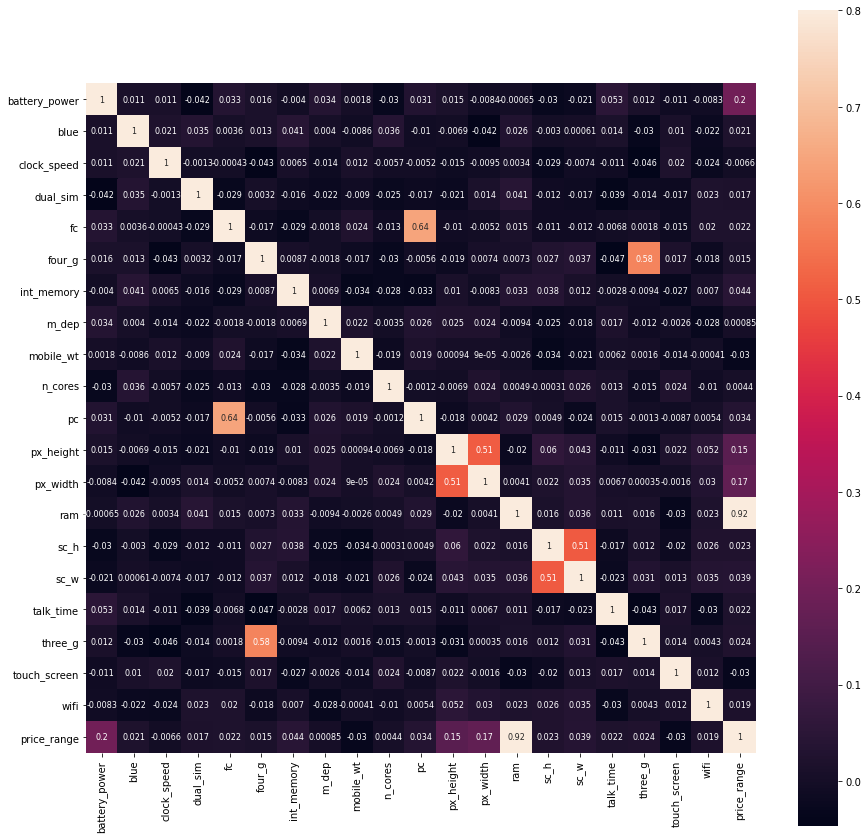

In [10]:
corr = df.corr()
plt.subplots(figsize = (15, 15))
sns.heatmap(corr, vmax = 0.8, square = True, annot = True, annot_kws = {'size' : 8})
plt.show()

## 그래프를 통한 상관관계

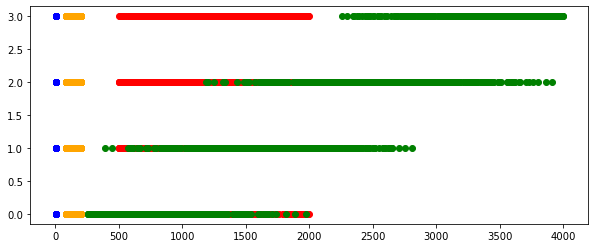

In [11]:
plt.subplots(figsize = (10, 4))
plt.scatter(y = df['price_range'], x = df['battery_power'], color = 'red')
plt.scatter(y = df['price_range'], x = df['ram'], color = 'green')
plt.scatter(y = df['price_range'], x = df['n_cores'], color = 'blue')
plt.scatter(y = df['price_range'], x = df['mobile_wt'], color = 'orange')
plt.show()

전반적으로 다른 값들의 상관성은 찾아보기 힘들다. 반면 초록색 bar `RAM`의 경우 전체적으로 우상향하는 경향을 볼 수 있다.

## SVM 모델 생성

SVC는 분류형 모델(support vector classifier), SVR은 회귀형 모델(support vector regressor)이다. target 변수가 카테고리형이므로 SVC를 사용한다.

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [13]:
yt = np.array(df['price_range'])
xt = df.drop(['price_range'], axis = 1)
xt = np.array(xt)

In [14]:
scaler = MinMaxScaler()
xt = scaler.fit_transform(xt)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.2, random_state = 42)

Linear SVM 모델에서 C 값에 따라 정확도가 바뀐다. 여기서 C는 slack variable weight(슬랙 변수의 가중치)를 의미한다. 이 값이 분류를 하는데 오차를 허용하는 범위인 margin 값을 조정한다. C 값이 커지면 허용 오차의 개수가 작아지므로 가중치 값에 집중하는 경향이 발생한다. 이에 따라 margin이 좁아진다. 반대로 C 값이 작아지면 margin은 커지게 된다. C 값을 통해서 margin 폭을 유연하게 조절 가능하다.

In [16]:
scores = []
for C in range(1, 100):
    svc = SVC(kernel = 'linear', C = C)
    model = svc.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print('Linear SVM | C : {} | training score : {:2f} | test score : {:2f}'.format(C, train_score, test_score))
    scores.append([train_score, test_score])

Linear SVM | C : 1 | training score : 0.953750 | test score : 0.960000
Linear SVM | C : 2 | training score : 0.959375 | test score : 0.975000
Linear SVM | C : 3 | training score : 0.961875 | test score : 0.977500
Linear SVM | C : 4 | training score : 0.968125 | test score : 0.972500
Linear SVM | C : 5 | training score : 0.968125 | test score : 0.975000
Linear SVM | C : 6 | training score : 0.969375 | test score : 0.980000
Linear SVM | C : 7 | training score : 0.970625 | test score : 0.967500
Linear SVM | C : 8 | training score : 0.975000 | test score : 0.967500
Linear SVM | C : 9 | training score : 0.975000 | test score : 0.962500
Linear SVM | C : 10 | training score : 0.977500 | test score : 0.967500
Linear SVM | C : 11 | training score : 0.975625 | test score : 0.967500
Linear SVM | C : 12 | training score : 0.976250 | test score : 0.970000
Linear SVM | C : 13 | training score : 0.977500 | test score : 0.965000
Linear SVM | C : 14 | training score : 0.977500 | test score : 0.967500
L

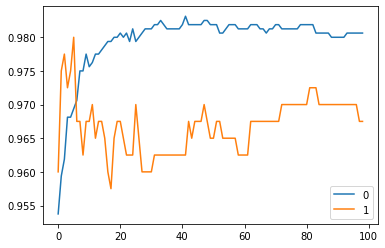

In [17]:
pd.DataFrame(scores).plot()
plt.show()

## Cross Validation

Cross Validation score를 적용하여 결과를 확인할 수 있다. CV를 통해 과적합을 방지하고 전체적인 데이터를 고르게 사용한다. `StratifiedKFold`를 사용하여 CV를 적용하는 방법도 있다. `StratifiedKFold`의 경우 label의 분포를 유지시켜준다. 각 fold 안의 데이터셋의 label 분포가 전체 데이터셋의 label 분포를 따른다. 즉, 각 fold가 전체 데이터셋을 잘 대표한다. --> 편향 X

In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = SVC(kernel = 'linear', C = 20).fit(x_train, y_train)
scores = cross_val_score(model, x_train, y_train, cv = 5)
print('CV 점수 : ' +str(scores))
st_scores = cross_val_score(model, x_train, y_train, cv = StratifiedKFold(5, random_state = 10, shuffle=True))
print('StratifiedKFold 점수 : ' +str(st_scores))
print()
print('CV 평균 점수 : ' +str(scores.mean()))
print('StratifiedKFold CV 평균 점수 : ' +str(st_scores.mean()))

CV 점수 : [0.95     0.9625   0.95     0.925    0.971875]
StratifiedKFold 점수 : [0.95625  0.95     0.94375  0.971875 0.94375 ]

CV 평균 점수 : 0.9518749999999999
StratifiedKFold CV 평균 점수 : 0.953125


## LinearSVC

LinearSVC를 사용해서 같은 모델을 만들 수 있다. LinearSVC는 일반 SVC 보다 훨씬 빠른 결과를 도출하지만 전체적인 성능이 떨어진다. 따라서 데이터가 매우 커진다면 간단하게 LinearSVC로 적합한 C과 gamma값을 찾은 후 SVC를 돌리는 등으로 응용할 수 있다.

In [19]:
from sklearn.svm import LinearSVC

for C in [1,3,5,10,40,60,80,100]:
    model2 = LinearSVC(C = C).fit(x_train, y_train)
    train_score = model2.score(x_train, y_train)
    test_score = model2.score(x_test, y_test)
    print("Linear SVM : C:{}, training score:{:2f}, test score:{:2f} \n".format(C, train_score, test_score)) 

Linear SVM : C:1, training score:0.846250, test score:0.840000 



/home/hyhan/.pyenv/versions/keras/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : C:3, training score:0.864375, test score:0.855000 



/home/hyhan/.pyenv/versions/keras/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : C:5, training score:0.867500, test score:0.872500 



/home/hyhan/.pyenv/versions/keras/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : C:10, training score:0.875000, test score:0.872500 



/home/hyhan/.pyenv/versions/keras/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : C:40, training score:0.855625, test score:0.847500 



/home/hyhan/.pyenv/versions/keras/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : C:60, training score:0.841250, test score:0.830000 



/home/hyhan/.pyenv/versions/keras/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM : C:80, training score:0.814375, test score:0.810000 

Linear SVM : C:100, training score:0.790625, test score:0.787500 



/home/hyhan/.pyenv/versions/keras/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Gamma

In [20]:
for Gamma in [.1, .25, .5, 1]:
    for C in [1,5,10,20,40,100]:
        model3=SVC(kernel="rbf", C=C, 
                   gamma=Gamma).fit(x_train, y_train)
        m3train=model3.score(x_train,y_train)
        m3test=model3.score(x_test,y_test)
        print("RBF SVM : C:{}, gamma:{},training score:{:2f},test score:{:2f} \n".format(C, Gamma, m3train, m3test)) 

RBF SVM : C:1, gamma:0.1,training score:0.928750,test score:0.902500 

RBF SVM : C:5, gamma:0.1,training score:0.965000,test score:0.907500 

RBF SVM : C:10, gamma:0.1,training score:0.979375,test score:0.907500 

RBF SVM : C:20, gamma:0.1,training score:0.990000,test score:0.912500 

RBF SVM : C:40, gamma:0.1,training score:0.995000,test score:0.902500 

RBF SVM : C:100, gamma:0.1,training score:1.000000,test score:0.907500 

RBF SVM : C:1, gamma:0.25,training score:0.959375,test score:0.887500 

RBF SVM : C:5, gamma:0.25,training score:0.990000,test score:0.872500 

RBF SVM : C:10, gamma:0.25,training score:0.998125,test score:0.895000 

RBF SVM : C:20, gamma:0.25,training score:1.000000,test score:0.902500 

RBF SVM : C:40, gamma:0.25,training score:1.000000,test score:0.897500 

RBF SVM : C:100, gamma:0.25,training score:1.000000,test score:0.897500 

RBF SVM : C:1, gamma:0.5,training score:0.980625,test score:0.835000 

RBF SVM : C:5, gamma:0.5,training score:1.000000,test score:0

In [21]:
from sklearn.model_selection import GridSearchCV
param={'C':[1,5,10,20,40,100],
      'gamma':[.1, .25, .5, 1]}
GS=GridSearchCV(SVC(kernel='rbf'),param, cv=5)
GS.fit(x_train, y_train)
print(GS.best_params_)
print(GS.best_score_)

{'C': 10, 'gamma': 0.1}
0.903125


In [22]:
test=test.drop(['id'],axis=1)
test.head()
testmat=np.array(test)
test=scaler.fit_transform(test)
#test(DF -> array)
model=SVC(kernel='rbf', C=5, gamma=.1).fit(x_train, y_train)

In [23]:
prediction=model.predict(test)
pred=pd.DataFrame(prediction)
pred

,0
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,1
998,2


In [31]:
type(test)

numpy.ndarray

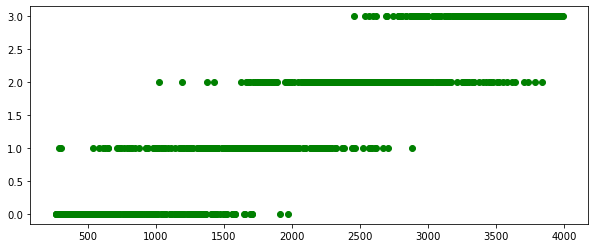

In [36]:
plt.subplots(figsize = (10, 4))
plt.scatter(y = pred[:], x = test['ram'], color = 'green')
plt.show()

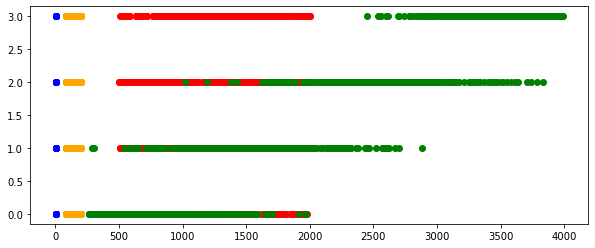

In [37]:
plt.subplots(figsize = (10, 4))
plt.scatter(y = pred[:], x = test['battery_power'], color = 'red')
plt.scatter(y = pred[:], x = test['ram'], color = 'green')
plt.scatter(y = pred[:], x = test['n_cores'], color = 'blue')
plt.scatter(y = pred[:], x = test['mobile_wt'], color = 'orange')
plt.show()